# Overview of this jupyter notebook

1. Load the dataframes
<br>1.1 padding dataframes with zeros
2. Feature Engineering with tsfresh
<br>2.1 Preprocess Data into a dataframe to fulfill the requirement of tsfresh
<br>2.2 Extract features from dataframe
<br>2.3 Split feature in train/test and create label for each
<br>2.4 Create relevance_table based on the p-values
3. Save feature, label and relevance_table

In [94]:
import pandas as pd
import numpy as np
import tsfresh as ts
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.utils import to_categorical
from tqdm.notebook import tqdm_notebook as tq
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
import json
import random
import pickle
import importlib
from library import faps_color as fapsc        # this module contains the color combination of FAPS Institute
from library import etl_helper as etl   # this module contains functions that load, visualize and save the data
print(importlib.reload(fapsc))
print(importlib.reload(etl))

<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\faps_color.py'>
<module 'library.visualization_helper' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\visualization_helper.py'>


# 1. Load the dataframes

In [3]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube']

In [4]:
df0 = pd.read_pickle("dataframes/df0_v2.pkl")
df1 = pd.read_pickle("dataframes/df1_v2.pkl")
df2 = pd.read_pickle("dataframes/df2_v2.pkl")
df3 = pd.read_pickle("dataframes/df3_v2.pkl")
df4 = pd.read_pickle("dataframes/df4_v2.pkl")
df5 = pd.read_pickle("dataframes/df5_v2.pkl")
df6 = pd.read_pickle("dataframes/df6_v2.pkl")
df7 = pd.read_pickle("dataframes/df7_v2.pkl")

In [5]:
df16 = pd.read_pickle("dataframes/df16_v2.pkl")
df24 = pd.read_pickle("dataframes/df24_v2.pkl")
df27 = pd.read_pickle("dataframes/df27_v2.pkl")
df35 = pd.read_pickle("dataframes/df35_v2.pkl")
df37 = pd.read_pickle("dataframes/df37_v2.pkl")
df267 = pd.read_pickle("dataframes/df267_v2.pkl")
df357 = pd.read_pickle("dataframes/df357_v2.pkl")

In [6]:
df0.shape

(775, 800)

In [7]:
# reduce number of curves from class 0: 800 -> 200
# so that every class has 200 curves each for the classification

df0 = df0[df0.columns[600:]]
df0.columns = range(df0.shape[1])
df0.shape

(775, 200)

In [8]:
df0

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.02240,0.01792,0.01344,0.01792,0.00896,0.00448,0.01792,0.02240,0.00000,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00448,0.00448,0.00448,0.01344,0.00896,0.00448,0.01344,0.00896,0.00448,0.00896,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01792,0.01792,0.01344,0.01792,0.01792,0.00448,0.01792,0.02240,0.00896,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.38080,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
771,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.20160,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
772,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
773,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [9]:
dfs = {"df0":df0, "df1":df1, "df2":df2, "df3":df3, "df4":df4, "df5":df5, "df6":df6, "df7":df7,
       "df16":df16, "df24":df24, "df27":df27, "df35":df35, "df37":df37, "df267":df267, "df357":df357}

In [10]:
for i in dfs:
    print(f"length of {i}: {len(dfs[i])}")

length of df0: 775
length of df1: 931
length of df2: 812
length of df3: 697
length of df4: 803
length of df5: 766
length of df6: 743
length of df7: 748
length of df16: 877
length of df24: 816
length of df27: 774
length of df35: 728
length of df37: 716
length of df267: 778
length of df357: 729


In [11]:
tot_nr_curves = []

for i in dfs:
    print(f"{i} number of curves: {len(dfs[i].columns)}")
    tot_nr_curves.append(len(dfs[i].columns))
    
print(f"tot_nr_curves: {sum(tot_nr_curves)}")

df0 number of curves: 200
df1 number of curves: 200
df2 number of curves: 200
df3 number of curves: 200
df4 number of curves: 200
df5 number of curves: 200
df6 number of curves: 200
df7 number of curves: 200
df16 number of curves: 100
df24 number of curves: 100
df27 number of curves: 100
df35 number of curves: 100
df37 number of curves: 100
df267 number of curves: 100
df357 number of curves: 100
tot_nr_curves: 2300


In [12]:
tot_nr_curves

[200, 200, 200, 200, 200, 200, 200, 200, 100, 100, 100, 100, 100, 100, 100]

In [13]:
class_sector = np.cumsum(tot_nr_curves)
class_sector

array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1700, 1800, 1900,
       2000, 2100, 2200, 2300], dtype=int32)

## 1.1 padding dataframes with zeros

In [15]:
def zero_padding(df, len_curve):
    
    to_pad = len_curve - len(df)
    zeros = np.zeros(to_pad*len(df.columns)).reshape(to_pad, len(df.columns))
    df_zeros = pd.DataFrame(zeros)    
    df_padded = df.append(df_zeros)
    df_padded = df_padded.reset_index(drop=True)
    
    return df_padded

In [21]:
def pad_df(df, len_curve=920):
    
    if len(df)>len_curve:
        print(f"this dataframe has a length of {len(df)}")
    else:
        df_padded = zero_padding(df, len_curve)
        print(df_padded.shape)
        return df_padded

In [22]:
df0p = pad_df(df0)
df1p = df1[:920]
df2p = pad_df(df2)
df3p = pad_df(df3)
df4p = pad_df(df4)
df5p = pad_df(df5)
df6p = pad_df(df6)
df7p = pad_df(df7)

df1p.shape

(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)


(920, 200)

In [23]:
df16p = pad_df(df16)
df24p = pad_df(df24)
df27p = pad_df(df27)
df35p = pad_df(df35)
df37p = pad_df(df37)
df267p = pad_df(df267)
df357p = pad_df(df357)

(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)


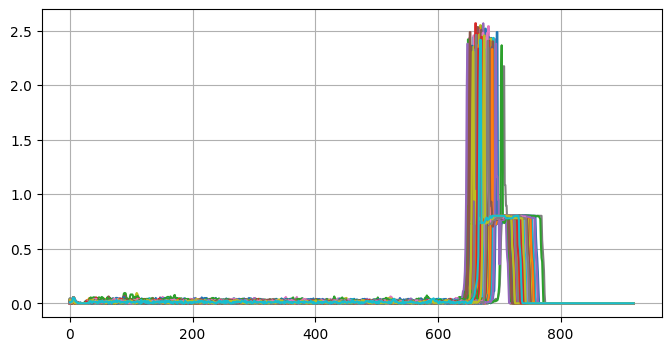

In [24]:
plt.figure(figsize=(8,4))
plt.plot(df0p)
plt.grid()
plt.show()

In [25]:
df0p

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.02240,0.01792,0.01344,0.01792,0.00896,0.00448,0.01792,0.02240,0.00000,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00448,0.00448,0.00448,0.01344,0.00896,0.00448,0.01344,0.00896,0.00448,0.00896,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01792,0.01792,0.01344,0.01792,0.01792,0.00448,0.01792,0.02240,0.00896,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


# 2. Feature Engineering with tsfresh

## 2.1 Preprocess Data into a dataframe to fulfill the requirement of tsfresh 

In [26]:
dfcon = pd.concat([df0p, df1p, df2p, df3p, df4p, df5p, df6p, df7p,
                   df16p, df24p, df27p, df35p, df37p, df267p, df357p], axis=1, ignore_index=True)
dfcon

,0,1,2,3,4,5,6,7,8,9,...,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299
0,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00448,0.00000,0.02240,0.00000,0.03136,0.01344,0.02688,0.02240
1,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00448,0.00000,0.02240,0.00000,0.02688,0.01344,0.02688,0.02240
2,0.02240,0.01792,0.01344,0.01792,0.00896,0.00448,0.01792,0.02240,0.00000,0.00896,...,0.01792,0.01792,0.00896,0.00000,0.00448,0.00448,0.00896,0.01344,0.01792,0.00896
3,0.00448,0.00448,0.00448,0.01344,0.00896,0.00448,0.01344,0.00896,0.00448,0.00896,...,0.00448,0.00448,0.00448,0.00448,0.00000,0.00000,0.00448,0.00896,0.00896,0.00448
4,0.01792,0.01792,0.01344,0.01792,0.01792,0.00448,0.01792,0.02240,0.00896,0.00896,...,0.01792,0.01792,0.00896,0.00448,0.00000,0.00896,0.00896,0.01792,0.01792,0.01344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [27]:
len_curve = 920
torque = pd.Series()
ids = np.array([])
time = np.array([])

for col in tq(dfcon):
    torque = pd.concat([torque, dfcon[col]], axis=0)

    ids = np.concatenate((ids, (np.zeros(len_curve)+col)), axis=0)
    
    time = np.concatenate((time, etl.set_time(dfcon[col])), axis=0)
    

  0%|          | 0/920 [00:00<?, ?it/s]

In [28]:
ids.shape, time.shape, torque.shape

((2116000,), (2116000,), (2116000,))

In [30]:
ids[100:2000]

array([0., 0., 0., ..., 2., 2., 2.])

In [32]:
df_ts = pd.DataFrame({'id':ids, 'time':time, 'torque':torque})
df_ts = df_ts.reset_index(drop=True)
df_ts = df_ts.astype({'id': int})
df_ts

,id,time,torque
0,0,0.0000,0.01792
1,0,0.0035,0.01792
2,0,0.0070,0.02240
3,0,0.0105,0.00448
4,0,0.0140,0.01792
...,...,...,...
2115995,2299,3.2025,0.00000
2115996,2299,3.2060,0.00000
2115997,2299,3.2095,0.00000
2115998,2299,3.2130,0.00000


## 2.2 Extract features from dataframe

In [33]:
from tsfresh import extract_features

extracted_features = extract_features(df_ts, column_id='id', column_sort='time')

Feature Extraction: 100%|█████████████████████████████████████████████████████████████| 10/10 [20:20<00:00, 122.09s/it]


In [34]:
extracted_features

,torque__variance_larger_than_standard_deviation,torque__has_duplicate_max,torque__has_duplicate_min,torque__has_duplicate,torque__sum_values,torque__abs_energy,torque__mean_abs_change,torque__mean_change,torque__mean_second_derivative_central,torque__median,...,torque__permutation_entropy__dimension_6__tau_1,torque__permutation_entropy__dimension_7__tau_1,torque__query_similarity_count__query_None__threshold_0.0,"torque__matrix_profile__feature_""min""__threshold_0.98","torque__matrix_profile__feature_""max""__threshold_0.98","torque__matrix_profile__feature_""mean""__threshold_0.98","torque__matrix_profile__feature_""median""__threshold_0.98","torque__matrix_profile__feature_""25""__threshold_0.98","torque__matrix_profile__feature_""75""__threshold_0.98",torque__mean_n_absolute_max__number_of_maxima_7
0,0.0,1.0,1.0,1.0,71.68000,55.540256,0.009408,-0.000019,0.000000,0.01792,...,4.272259,4.837537,NaN,13.020280,17.221124,15.004669,14.928396,14.649392,15.399069,1.39392
1,0.0,1.0,1.0,1.0,61.78816,54.766943,0.008863,-0.000010,0.000000,0.00448,...,4.072036,4.750092,NaN,12.689742,18.053885,15.645368,15.501285,15.136034,16.040616,1.44448
2,0.0,1.0,1.0,1.0,59.58848,52.920326,0.008131,-0.000029,0.000000,0.00000,...,3.526297,4.140780,NaN,13.136877,17.466132,15.641618,15.536178,15.356392,15.880918,1.34784
3,0.0,0.0,1.0,1.0,59.57952,52.894957,0.007517,-0.000019,0.000000,0.00000,...,3.412475,3.971081,NaN,12.091447,18.199465,15.780572,15.657365,15.294470,16.525849,1.42784
4,0.0,1.0,1.0,1.0,64.42240,55.730604,0.008716,0.000000,0.000000,0.00448,...,4.067013,4.704816,NaN,10.553874,18.247036,14.826537,14.750867,14.129488,15.438035,1.45920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.0,1.0,1.0,1.0,206.94464,121.339316,0.008746,0.000000,0.000000,0.05376,...,3.786215,4.332423,NaN,4.469671,18.249324,10.751682,10.705894,6.088590,14.554048,1.52640
2296,0.0,0.0,1.0,1.0,119.49504,65.344426,0.008321,-0.000034,0.000002,0.07168,...,3.891240,4.388360,NaN,7.716249,17.336798,12.807311,12.372016,10.798683,15.058598,1.58720
2297,0.0,1.0,1.0,1.0,209.82080,121.787609,0.009043,-0.000015,0.000000,0.04704,...,3.654447,4.207613,NaN,5.799650,18.383675,10.858291,10.293445,7.154297,14.712270,1.53152
2298,0.0,1.0,1.0,1.0,113.40672,63.939879,0.009048,-0.000029,0.000000,0.03584,...,3.792644,4.392273,NaN,2.838399,11.661904,6.171983,5.290481,4.264022,7.098041,1.51744


In [35]:
from tsfresh.utilities.dataframe_functions import impute

imputed_features = impute(extracted_features)

In [36]:
imputed_features

,torque__variance_larger_than_standard_deviation,torque__has_duplicate_max,torque__has_duplicate_min,torque__has_duplicate,torque__sum_values,torque__abs_energy,torque__mean_abs_change,torque__mean_change,torque__mean_second_derivative_central,torque__median,...,torque__permutation_entropy__dimension_6__tau_1,torque__permutation_entropy__dimension_7__tau_1,torque__query_similarity_count__query_None__threshold_0.0,"torque__matrix_profile__feature_""min""__threshold_0.98","torque__matrix_profile__feature_""max""__threshold_0.98","torque__matrix_profile__feature_""mean""__threshold_0.98","torque__matrix_profile__feature_""median""__threshold_0.98","torque__matrix_profile__feature_""25""__threshold_0.98","torque__matrix_profile__feature_""75""__threshold_0.98",torque__mean_n_absolute_max__number_of_maxima_7
0,0.0,1.0,1.0,1.0,71.68000,55.540256,0.009408,-0.000019,0.000000,0.01792,...,4.272259,4.837537,0.0,13.020280,17.221124,15.004669,14.928396,14.649392,15.399069,1.39392
1,0.0,1.0,1.0,1.0,61.78816,54.766943,0.008863,-0.000010,0.000000,0.00448,...,4.072036,4.750092,0.0,12.689742,18.053885,15.645368,15.501285,15.136034,16.040616,1.44448
2,0.0,1.0,1.0,1.0,59.58848,52.920326,0.008131,-0.000029,0.000000,0.00000,...,3.526297,4.140780,0.0,13.136877,17.466132,15.641618,15.536178,15.356392,15.880918,1.34784
3,0.0,0.0,1.0,1.0,59.57952,52.894957,0.007517,-0.000019,0.000000,0.00000,...,3.412475,3.971081,0.0,12.091447,18.199465,15.780572,15.657365,15.294470,16.525849,1.42784
4,0.0,1.0,1.0,1.0,64.42240,55.730604,0.008716,0.000000,0.000000,0.00448,...,4.067013,4.704816,0.0,10.553874,18.247036,14.826537,14.750867,14.129488,15.438035,1.45920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.0,1.0,1.0,1.0,206.94464,121.339316,0.008746,0.000000,0.000000,0.05376,...,3.786215,4.332423,0.0,4.469671,18.249324,10.751682,10.705894,6.088590,14.554048,1.52640
2296,0.0,0.0,1.0,1.0,119.49504,65.344426,0.008321,-0.000034,0.000002,0.07168,...,3.891240,4.388360,0.0,7.716249,17.336798,12.807311,12.372016,10.798683,15.058598,1.58720
2297,0.0,1.0,1.0,1.0,209.82080,121.787609,0.009043,-0.000015,0.000000,0.04704,...,3.654447,4.207613,0.0,5.799650,18.383675,10.858291,10.293445,7.154297,14.712270,1.53152
2298,0.0,1.0,1.0,1.0,113.40672,63.939879,0.009048,-0.000029,0.000000,0.03584,...,3.792644,4.392273,0.0,2.838399,11.661904,6.171983,5.290481,4.264022,7.098041,1.51744


In [37]:
#imputed_features.to_pickle("dataframes/mlc_tsfresh_imputed_features_v2.4.pkl")

## 2.3 Split feature in train/test and create label for each

In [14]:
df_feat = pd.read_pickle("dataframes/mlc_tsfresh_imputed_features_v2.4.pkl")
df_feat.shape

(2300, 789)

In [15]:
class_sector

array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1700, 1800, 1900,
       2000, 2100, 2200, 2300], dtype=int32)

In [16]:
def split_df_ts(df):
    
    x_train, x_test = train_test_split(df, random_state=9, test_size=50, shuffle=True)
    
    return x_train, x_test

In [17]:
cl0train, cl0test = split_df_ts(df_feat.iloc[:200])
cl1train, cl1test = split_df_ts(df_feat.iloc[200:400])
cl2train, cl2test = split_df_ts(df_feat.iloc[400:600])
cl3train, cl3test = split_df_ts(df_feat.iloc[600:800])
cl4train, cl4test = split_df_ts(df_feat.iloc[800:1000])
cl5train, cl5test = split_df_ts(df_feat.iloc[1000:1200])
cl6train, cl6test = split_df_ts(df_feat.iloc[1200:1400])
cl7train, cl7test = split_df_ts(df_feat.iloc[1400:1600])
cl16train, cl16test = split_df_ts(df_feat.iloc[1600:1700])
cl24train, cl24test = split_df_ts(df_feat.iloc[1700:1800])
cl27train, cl27test = split_df_ts(df_feat.iloc[1800:1900])
cl35train, cl35test = split_df_ts(df_feat.iloc[1900:2000])
cl37train, cl37test = split_df_ts(df_feat.iloc[2000:2100])
cl267train, cl267test = split_df_ts(df_feat.iloc[2100:2200])
cl357train, cl357test = split_df_ts(df_feat.iloc[2200:2300])

In [18]:
cl0train.shape, cl0test.shape, cl7train.shape, cl7test.shape, cl357train.shape, cl357test.shape

((150, 789), (50, 789), (150, 789), (50, 789), (50, 789), (50, 789))

In [19]:
feature_train = pd.concat([cl0train, cl1train, cl2train, cl3train, cl4train, cl5train, cl6train, cl7train, 
                           cl16train, cl24train, cl27train, cl35train, cl37train, cl267train, cl357train], axis=0)
feature_train.shape

(1550, 789)

In [20]:
feature_test = pd.concat([cl0test, cl1test, cl2test, cl3test, cl4test, cl5test, cl6test, cl7test, 
                          cl16test, cl24test, cl27test, cl35test, cl37test, cl267test, cl357test], axis=0)
feature_test.shape

(750, 789)

In [21]:
feature_train

,torque__variance_larger_than_standard_deviation,torque__has_duplicate_max,torque__has_duplicate_min,torque__has_duplicate,torque__sum_values,torque__abs_energy,torque__mean_abs_change,torque__mean_change,torque__mean_second_derivative_central,torque__median,...,torque__permutation_entropy__dimension_6__tau_1,torque__permutation_entropy__dimension_7__tau_1,torque__query_similarity_count__query_None__threshold_0.0,"torque__matrix_profile__feature_""min""__threshold_0.98","torque__matrix_profile__feature_""max""__threshold_0.98","torque__matrix_profile__feature_""mean""__threshold_0.98","torque__matrix_profile__feature_""median""__threshold_0.98","torque__matrix_profile__feature_""25""__threshold_0.98","torque__matrix_profile__feature_""75""__threshold_0.98",torque__mean_n_absolute_max__number_of_maxima_7
189,0.0,1.0,1.0,1.0,65.09888,57.559800,0.008941,-0.000019,0.0,0.00448,...,4.129336,4.778698,0.0,12.195090,17.296100,14.738419,14.948549,14.006102,15.380646,1.55712
25,0.0,1.0,1.0,1.0,60.90560,54.187491,0.007883,-0.000005,0.0,0.00000,...,3.564511,4.184912,0.0,11.106993,17.410043,14.772999,14.517833,14.301452,15.005476,1.42720
167,0.0,1.0,1.0,1.0,61.63584,54.586992,0.008409,-0.000005,0.0,0.00000,...,3.804779,4.455650,0.0,12.349663,16.346892,14.472947,14.455815,13.672074,15.165306,1.36896
166,0.0,0.0,1.0,1.0,64.48512,56.234210,0.009262,-0.000010,0.0,0.00448,...,4.229036,4.855000,0.0,11.964723,16.799544,14.339407,14.162828,13.790073,14.828332,1.49760
95,0.0,1.0,1.0,1.0,60.78912,53.680673,0.008809,-0.000005,0.0,0.00000,...,3.808285,4.488801,0.0,12.522105,17.445355,15.632224,15.642972,15.306329,16.025583,1.47456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,0.0,0.0,1.0,1.0,107.14816,60.013125,0.008468,-0.000015,0.0,0.04928,...,3.840953,4.417213,0.0,9.316146,18.594629,13.701058,14.035138,12.292976,15.436668,1.52256
2222,0.0,0.0,1.0,1.0,126.29568,66.194728,0.008702,-0.000024,0.0,0.06272,...,3.717523,4.260557,0.0,7.511401,15.865484,10.769216,10.522878,8.652981,13.012222,1.53856
2256,0.0,1.0,1.0,1.0,169.66208,83.760061,0.009179,-0.000034,0.0,0.11200,...,3.773523,4.329425,0.0,6.508181,15.468219,10.902187,11.316159,9.169568,12.689405,1.55712
2254,0.0,0.0,1.0,1.0,129.51680,67.521602,0.008619,0.000000,0.0,0.04480,...,3.803108,4.416773,0.0,7.718874,18.596990,12.130127,11.730727,9.259788,14.846277,1.45728


In [22]:
# 789 features are extracted for train and test data

feature_test

,torque__variance_larger_than_standard_deviation,torque__has_duplicate_max,torque__has_duplicate_min,torque__has_duplicate,torque__sum_values,torque__abs_energy,torque__mean_abs_change,torque__mean_change,torque__mean_second_derivative_central,torque__median,...,torque__permutation_entropy__dimension_6__tau_1,torque__permutation_entropy__dimension_7__tau_1,torque__query_similarity_count__query_None__threshold_0.0,"torque__matrix_profile__feature_""min""__threshold_0.98","torque__matrix_profile__feature_""max""__threshold_0.98","torque__matrix_profile__feature_""mean""__threshold_0.98","torque__matrix_profile__feature_""median""__threshold_0.98","torque__matrix_profile__feature_""25""__threshold_0.98","torque__matrix_profile__feature_""75""__threshold_0.98",torque__mean_n_absolute_max__number_of_maxima_7
84,0.0,1.0,1.0,1.0,62.01216,56.686236,0.008760,-0.000024,0.000000,0.00000,...,3.964381,4.592011,0.0,11.975847,17.499954,15.515765,15.542512,15.159144,15.819668,1.53088
60,0.0,1.0,1.0,1.0,60.39488,54.321120,0.008122,-0.000019,0.000000,0.00000,...,3.632159,4.317026,0.0,3.554108,11.661904,8.381748,8.272633,7.619237,8.611756,1.43104
54,0.0,1.0,1.0,1.0,59.83040,52.729457,0.008029,-0.000015,0.000000,0.00000,...,3.812369,4.470812,0.0,12.614075,16.919705,14.972801,14.778254,14.394351,15.489060,1.38816
109,0.0,1.0,1.0,1.0,60.58752,53.615745,0.008195,-0.000015,0.000000,0.00000,...,3.703935,4.376347,0.0,11.295528,16.484437,14.927508,15.016949,14.783041,15.295548,1.45472
156,0.0,0.0,1.0,1.0,65.41696,57.588521,0.008882,-0.000010,0.000000,0.00448,...,4.150912,4.816814,0.0,12.223351,17.154663,14.850483,14.686025,14.235285,15.507304,1.53728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,0.0,1.0,1.0,1.0,158.72640,87.875517,0.008273,-0.000024,0.000000,0.03584,...,3.888264,4.437193,0.0,7.580443,18.156298,12.525351,12.616794,10.908088,14.635832,1.54240
2208,0.0,1.0,1.0,1.0,128.49088,67.436363,0.008833,-0.000039,0.000002,0.05376,...,3.833210,4.335263,0.0,6.544360,16.668119,11.811818,12.375507,11.070217,13.782970,1.58784
2267,0.0,0.0,1.0,1.0,163.63648,88.699487,0.008882,-0.000010,0.000000,0.05824,...,3.681304,4.228724,0.0,7.721329,16.535614,12.230980,12.495336,10.044778,14.287139,1.51616
2266,0.0,0.0,1.0,1.0,138.83968,70.272672,0.008239,0.000000,0.000000,0.07168,...,3.930104,4.513354,0.0,8.000457,18.435335,12.598284,12.532484,9.695188,15.590366,1.55392


In [23]:
def build_multi_label(shape_list, p0=None, p1=None, p2=None):
    
    label = np.zeros(shape_list[0]*shape_list[1]).reshape(shape_list[0], shape_list[1])
    
    if p0 is not None:
        label[:, p0] = 1
    if p1 is not None:
        label[:, p1] = 1
    if p2 is not None:
        label[:, p2] = 1
    
    return label

In [24]:
class_amount = 8
l0train = build_multi_label(shape_list=[len(cl0train), class_amount], p0=0)
l1train = build_multi_label(shape_list=[len(cl1train), class_amount], p0=1)
l2train = build_multi_label(shape_list=[len(cl2train), class_amount], p0=2)
l3train = build_multi_label(shape_list=[len(cl3train), class_amount], p0=3)
l4train = build_multi_label(shape_list=[len(cl4train), class_amount], p0=4)
l5train = build_multi_label(shape_list=[len(cl5train), class_amount], p0=5)
l6train = build_multi_label(shape_list=[len(cl6train), class_amount], p0=6)
l7train = build_multi_label(shape_list=[len(cl7train), class_amount], p0=7)

l16train = build_multi_label(shape_list=[len(cl16train), class_amount], p0=1, p1=6)
l24train = build_multi_label(shape_list=[len(cl24train), class_amount], p0=2, p1=4)
l27train = build_multi_label(shape_list=[len(cl27train), class_amount], p0=2, p1=7)
l35train = build_multi_label(shape_list=[len(cl35train), class_amount], p0=3, p1=5)
l37train = build_multi_label(shape_list=[len(cl37train), class_amount], p0=3, p1=7)
l267train = build_multi_label(shape_list=[len(cl267train), class_amount], p0=2, p1=6, p2=7)
l357train = build_multi_label(shape_list=[len(cl357train), class_amount], p0=3, p1=5, p2=7)

In [25]:
l0train[0], l7train[0], l357train.shape

(array([1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1.]),
 (50, 8))

In [26]:
label_train_list = [l0train, l1train, l2train, l3train, l4train, l5train, l6train, l7train,
                    l16train, l24train, l27train, l35train, l37train, l267train, l357train]

In [27]:
def get_label_index(label_list, feature):
    
    lab = np.vstack(label_list)
    
    y = pd.DataFrame(lab).astype(int)        # convert array into pandas series -> tsfresh requires series for y
    y = y.set_index(feature.index.values)    # the index of labels has to match the index of features
    y = y.squeeze()
    
    return y

In [28]:
label_train = get_label_index(label_train_list, feature_train)
label_train

,0,1,2,3,4,5,6,7
189,1,0,0,0,0,0,0,0
25,1,0,0,0,0,0,0,0
167,1,0,0,0,0,0,0,0
166,1,0,0,0,0,0,0,0
95,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2265,0,0,0,1,0,1,0,1
2222,0,0,0,1,0,1,0,1
2256,0,0,0,1,0,1,0,1
2254,0,0,0,1,0,1,0,1


In [29]:
class_amount = 8
l0test = build_multi_label(shape_list=[len(cl0test), class_amount], p0=0)
l1test = build_multi_label(shape_list=[len(cl1test), class_amount], p0=1)
l2test = build_multi_label(shape_list=[len(cl2test), class_amount], p0=2)
l3test = build_multi_label(shape_list=[len(cl3test), class_amount], p0=3)
l4test = build_multi_label(shape_list=[len(cl4test), class_amount], p0=4)
l5test = build_multi_label(shape_list=[len(cl5test), class_amount], p0=5)
l6test = build_multi_label(shape_list=[len(cl6test), class_amount], p0=6)
l7test = build_multi_label(shape_list=[len(cl7test), class_amount], p0=7)

l16test = build_multi_label(shape_list=[len(cl16test), class_amount], p0=1, p1=6)
l24test = build_multi_label(shape_list=[len(cl24test), class_amount], p0=2, p1=4)
l27test = build_multi_label(shape_list=[len(cl27test), class_amount], p0=2, p1=7)
l35test = build_multi_label(shape_list=[len(cl35test), class_amount], p0=3, p1=5)
l37test = build_multi_label(shape_list=[len(cl37test), class_amount], p0=3, p1=7)
l267test = build_multi_label(shape_list=[len(cl267test), class_amount], p0=2, p1=6, p2=7)
l357test = build_multi_label(shape_list=[len(cl357test), class_amount], p0=3, p1=5, p2=7)

In [34]:
l0test.shape, l7test.shape, l357test.shape

((50, 8), (50, 8), (50, 8))

In [35]:
label_test_list = [l0test, l1test, l2test, l3test, l4test, l5test, l6test, l7test,
                   l16test, l24test, l27test, l35test, l37test, l267test, l357test]

In [36]:
label_test = get_label_index(label_test_list, feature_test)
label_test

,0,1,2,3,4,5,6,7
84,1,0,0,0,0,0,0,0
60,1,0,0,0,0,0,0,0
54,1,0,0,0,0,0,0,0
109,1,0,0,0,0,0,0,0
156,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2257,0,0,0,1,0,1,0,1
2208,0,0,0,1,0,1,0,1
2267,0,0,0,1,0,1,0,1
2266,0,0,0,1,0,1,0,1


In [57]:
label_single = np.zeros(1200)
label_multi = np.zeros(350)

for i in range(8):
    label_single[i*150:(i+1)*150] = i
    
for i in range(7):
    label_multi[i*50:(i+1)*50] = i+8
    

In [88]:
label_14classes = np.concatenate([label_single, label_multi])

label_train_multi = pd.DataFrame(label_14classes).astype(int)
label_train_multi = label_train_multi.set_index(feature_train.index.values)
label_train_multi = label_train_multi.squeeze()

In [89]:
label_train_multi

189      0
25       0
167      0
166      0
95       0
        ..
2265    14
2222    14
2256    14
2254    14
2292    14
Name: 0, Length: 1550, dtype: int32

## 2.4 Create relevance_table based on the p-values

In [90]:
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.transformers import FeatureSelector

In [91]:
# relevance_table shows wich feature is relevant for each class
# if p value is lower than the threshold 0.05, the feature is relevant for that class

relevance_table = calculate_relevance_table(feature_train, label_train_multi, ml_task="classification", multiclass=True)
relevance_table

,feature,type,p_value_0,relevant_0,p_value_1,relevant_1,p_value_2,relevant_2,p_value_3,relevant_3,...,p_value_11,relevant_11,p_value_12,relevant_12,p_value_13,relevant_13,p_value_14,relevant_14,n_significant,relevant
feature,,,,,,,,,,,,,,,,,,,,,
torque__variation_coefficient,torque__variation_coefficient,real,5.197543e-90,True,1.643083e-07,True,5.144671e-13,True,6.022008e-41,True,...,1.597761e-07,True,0.029758,False,1.769481e-17,True,0.002942,False,11,True
torque__lempel_ziv_complexity__bins_100,torque__lempel_ziv_complexity__bins_100,real,5.463394e-90,True,9.139738e-09,True,1.787593e-16,True,2.365570e-50,True,...,4.656514e-06,True,0.072377,False,1.791119e-30,True,0.000034,True,14,True
torque__mean,torque__mean,real,9.576607e-90,True,2.213726e-06,True,2.304176e-11,True,6.607692e-39,True,...,4.440944e-07,True,0.000483,True,7.502963e-16,True,0.000886,True,13,True
"torque__fft_coefficient__attr_""abs""__coeff_0","torque__fft_coefficient__attr_""abs""__coeff_0",real,9.576613e-90,True,2.214774e-06,True,2.302666e-11,True,6.591071e-39,True,...,4.452156e-07,True,0.000483,True,7.512830e-16,True,0.000887,True,13,True
"torque__fft_coefficient__attr_""real""__coeff_0","torque__fft_coefficient__attr_""real""__coeff_0",real,9.576613e-90,True,2.214774e-06,True,2.302666e-11,True,6.591071e-39,True,...,4.452156e-07,True,0.000483,True,7.512830e-16,True,0.000887,True,13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
torque__friedrich_coefficients__coeff_3__m_3__r_30,torque__friedrich_coefficients__coeff_3__m_3__...,constant,NaN,False,NaN,False,NaN,False,NaN,False,...,NaN,False,NaN,False,NaN,False,NaN,False,0,False
torque__max_langevin_fixed_point__m_3__r_30,torque__max_langevin_fixed_point__m_3__r_30,constant,NaN,False,NaN,False,NaN,False,NaN,False,...,NaN,False,NaN,False,NaN,False,NaN,False,0,False
torque__number_crossing_m__m_-1,torque__number_crossing_m__m_-1,constant,NaN,False,NaN,False,NaN,False,NaN,False,...,NaN,False,NaN,False,NaN,False,NaN,False,0,False


# 3. Save feature and label

In [99]:
feature_train.to_pickle("feature_label/mlc_feature_train_tsfresh_2.4.pkl")
feature_test.to_pickle("feature_label/mlc_feature_test_tsfresh_2.4.pkl")

In [100]:
label_train.to_pickle("feature_label/mlc_label_train_tsfresh_v2.4.pkl")
label_test.to_pickle("feature_label/mlc_label_test_tsfresh_v2.4.pkl")

In [101]:
relevance_table.to_pickle("feature_label/mlc_relevance_table_tsfresh_v2.4.pkl")